<a href="https://colab.research.google.com/github/amalvarezme/AnaliticaDatos/blob/master/AprendizajePorRefuerzo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Configuración de Python

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
    !apt update && apt install -y libpq-dev libsdl2-dev swig xorg-dev xvfb
    !pip install -q -U tf-agents pyvirtualdisplay gym[atari]
    IS_COLAB = True
except Exception:
    IS_COLAB = False

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

if not tf.config.list_physical_devices('GPU'):
    print("No GPU was detected. CNNs can be very slow without a GPU.")
    if IS_COLAB:
        print("Go to Runtime > Change runtime and select a GPU hardware accelerator.")

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# To get smooth animations
import matplotlib.animation as animation
mpl.rc('animation', html='jshtml')

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "rl"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:7 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [49.4 kB]
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:9 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:10 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:12 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Ign:13 https://developer.download.nvi

#  Introducción a OpenAI gym

Se utilizará [OpenAI gym](https://gym.openai.com/), como paquete básico para la simulación de ambientes/entornes orientados al entrenameinto de algoritmos de Aprendizaje por Refuerzo.

In [5]:
import gym
gym.envs.registry.all() #entornos disponibles

dict_values([EnvSpec(Copy-v0), EnvSpec(RepeatCopy-v0), EnvSpec(ReversedAddition-v0), EnvSpec(ReversedAddition3-v0), EnvSpec(DuplicatedInput-v0), EnvSpec(Reverse-v0), EnvSpec(CartPole-v0), EnvSpec(CartPole-v1), EnvSpec(MountainCar-v0), EnvSpec(MountainCarContinuous-v0), EnvSpec(Pendulum-v0), EnvSpec(Acrobot-v1), EnvSpec(LunarLander-v2), EnvSpec(LunarLanderContinuous-v2), EnvSpec(BipedalWalker-v3), EnvSpec(BipedalWalkerHardcore-v3), EnvSpec(CarRacing-v0), EnvSpec(Blackjack-v0), EnvSpec(KellyCoinflip-v0), EnvSpec(KellyCoinflipGeneralized-v0), EnvSpec(FrozenLake-v0), EnvSpec(FrozenLake8x8-v0), EnvSpec(CliffWalking-v0), EnvSpec(NChain-v0), EnvSpec(Roulette-v0), EnvSpec(Taxi-v3), EnvSpec(GuessingGame-v0), EnvSpec(HotterColder-v0), EnvSpec(Reacher-v2), EnvSpec(Pusher-v2), EnvSpec(Thrower-v2), EnvSpec(Striker-v2), EnvSpec(InvertedPendulum-v2), EnvSpec(InvertedDoublePendulum-v2), EnvSpec(HalfCheetah-v2), EnvSpec(HalfCheetah-v3), EnvSpec(Hopper-v2), EnvSpec(Hopper-v3), EnvSpec(Swimmer-v2), EnvSp

- El Cart-Pole es un escenario de simulación simple que permite movilizar a izquierda a derecha un carro con mastil.

- El agente debe mover el carro con el fin de mantener el mastil en vertical.

In [6]:
env = gym.make('CartPole-v1') #creamos el ambiente cartpole

Se inicializa el escenario:

In [7]:
env.seed(42)
obs = env.reset()#retorna una observación

- La observación varia según el escenario.
- En este caso es un numpy array con cuatro floats: posición horizontal, velocidad, ángulo del mastil (0 = vertical), y velocidad angular.

In [8]:
print(obs)

[-0.01258566 -0.00156614  0.04207708 -0.00180545]


-Un escenario puede ser vizualizado mediante el método `render()`.

**Warning**: algunos escanrios acceden a la pantalla para realizar el render, generando una nueva ventana. Para evitar problemas con el manejo de la pantalla en Jupyter o .ipynb se instala un servidor falso [Xvfb](http://en.wikipedia.org/wiki/Xvfb). 

In [11]:
try:
    import pyvirtualdisplay
    display = pyvirtualdisplay.Display(visible=0, size=(1400, 900)).start()
except ImportError:
    pass

In [12]:
display

In [13]:
env.render() # metodo render

True

Se activa el `mode="rgb_array"` para obtener una imagen del escenario como array de numpy:

In [14]:
img = env.render(mode="rgb_array")
img.shape

(400, 600, 3)

In [15]:
def plot_environment(env, figsize=(5,4)):#funcion para graficar escenario como imagen rgb
    plt.figure(figsize=figsize)
    img = env.render(mode="rgb_array")
    plt.imshow(img)
    plt.axis("off")
    return img

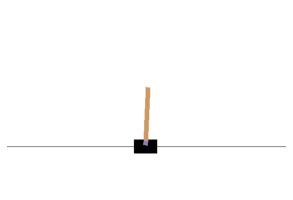

In [16]:
plot_environment(env)
plt.show()

- Cómo interactuar con el escenario?
-El agente debe escoger una acción del "action space"

In [17]:
env.action_space

Discrete(2)

Acciones disponibles: acelerar a izquierda o derecha

In [18]:
action = 1  # accelerate right
obs, reward, done, info = env.step(action)
obs

array([-0.01261699,  0.19292789,  0.04204097, -0.28092127])

- El carro se mueve a derecha (obs[1] > 0). 
-El mastil esta hacia la derecha (obs[2] > 0).
- Velocidad angular es negativa (obs[3] < 0).
- El mastil debe moverse a izquierda en el siguiente paso.

Saving figure cart_pole_plot


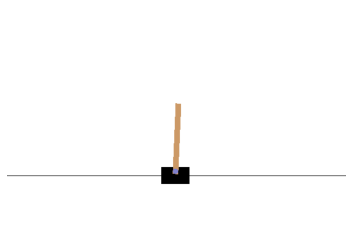

In [19]:
plot_environment(env)
save_fig("cart_pole_plot")

- El escenari también informa sobre la recompensa obtenida en el última paso:

In [21]:
reward

1.0

- Si el juego termina:

In [23]:
done

False

- `info` es un diccionario que provee información específica del escanario, por ejemplo: vidas restantes

In [24]:
info

{}

- La secuencia de pasos en el escenario desde el reset hasta done=True se conoce como "episode". 
- Al final de un (i.e., cuando `step()` retorna `done=True`), se debe resetear el escenario.

In [25]:
if done:
    obs = env.reset()

- Se necesita de una _policy_ para que el agente realice bien su trabajo. 

- Policy se refiere a la estrategia que seguira el agente para seleccionar una acción en cada paso.

- Puede tener en cuenta los pasos y acciones del pasado para decidir qué hacer!

# Policy simple

- Si el mastil se inclina a izquierda, empuja hacia la izquierda, y  _vice versa_. 

In [26]:
env.seed(42)

def basic_policy(obs):
    angle = obs[2]
    return 0 if angle < 0 else 1

totals = []
for episode in range(500):
    episode_rewards = 0
    obs = env.reset()
    for step in range(200):
        action = basic_policy(obs)
        obs, reward, done, info = env.step(action)
        episode_rewards += reward
        if done:
            break
    totals.append(episode_rewards)

In [27]:
np.mean(totals), np.std(totals), np.min(totals), np.max(totals)

(41.718, 8.858356280936096, 24.0, 68.0)

- Logró mantenerse vertical por 68 pasos! 
- El escenario es considerado exitoso para esta tarea si logra mantenerse al menos para 200 pasos.

In [31]:
env.seed(42)

frames = []

obs = env.reset()
for step in range(200):
    img = env.render(mode="rgb_array")
    frames.append(img)
    action = basic_policy(obs)

    obs, reward, done, info = env.step(action)
    if done:
        break

In [32]:
def update_scene(num, frames, patch):
    patch.set_data(frames[num])
    return patch,

def plot_animation(frames, repeat=False, interval=40):
    fig = plt.figure()
    patch = plt.imshow(frames[0])
    plt.axis('off')
    anim = animation.FuncAnimation(
        fig, update_scene, fargs=(frames, patch),
        frames=len(frames), repeat=repeat, interval=interval)
    plt.close()
    return anim

In [33]:
plot_animation(frames)